## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [107]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [108]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [109]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')

happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [110]:
countries.head()


,country_name,area,population,literacy
0,afghanistan,647500,31056997,36.0
1,albania,28748,3581655,86.5
2,algeria,2381740,32930091,70.0
3,argentina,2766890,39921833,97.1
4,armenia,29800,2976372,98.6


In [111]:
print(happiness.size, countries.size)
print(happiness.country.size, countries.country_name.size)
print(happiness.country.is_unique, countries.country_name.is_unique)

1080 540
135 135
True True


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [112]:
# Write your code here
happiness['country'] = happiness['country'].str.lower()
print(happiness.country.size)
happiness.head()


135


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [113]:
country_features = pd.merge(countries, happiness,left_on='country_name', right_on='country', how='outer')
print(country_features.country_name.size)
# print(country_features.isna().sum())
country_features = country_features.drop(['country'], axis=1)
country_features.head()


135


,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [114]:
# Write your code here
country_features[['country_name', 'happiness_score']].sort_values(ascending=False, by='happiness_score')

,country_name,happiness_score
38,finland,7.8087
31,denmark,7.6456
115,switzerland,7.5599
50,iceland,7.5045
92,norway,7.4880
...,...,...
14,botswana,3.4789
117,tanzania,3.4762
102,rwanda,3.3123
134,zimbabwe,3.2992


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [115]:
# Write your code here
# Group by world_region and compute average happiness and number of countries
world_regions = country_features[['world_region', 'country_name', 'happiness_score']].groupby(country_features.world_region).agg(
    avg_happiness=('happiness_score', 'mean'),
    num_countries=('country_name', 'count'), 
    countries = ('country_name', lambda x: list(x))
).reset_index()

world_regions = world_regions.sort_values('avg_happiness', ascending=False)
world_regions

,world_region,avg_happiness,num_countries,countries
5,North America and ANZ,7.173525,4,"[australia, canada, new zealand, united states]"
9,Western Europe,6.967405,20,"[austria, belgium, cyprus, denmark, finland, f..."
3,Latin America and Caribbean,5.971280,20,"[argentina, bolivia, brazil, chile, colombia, ..."
0,Central and Eastern Europe,5.891393,14,"[albania, bulgaria, croatia, czech republic, e..."
7,Southeast Asia,5.517788,8,"[cambodia, indonesia, laos, malaysia, philippi..."
2,East Asia,5.483633,3,"[china, japan, mongolia]"
1,Commonwealth of Independent States,5.358342,12,"[armenia, azerbaijan, belarus, georgia, kazakh..."
4,Middle East and North Africa,5.269306,16,"[algeria, bahrain, egypt, iran, iraq, israel, ..."
8,Sub-Saharan Africa,4.393856,32,"[benin, botswana, burkina faso, burundi, camer..."
6,South Asia,4.355083,6,"[afghanistan, bangladesh, india, nepal, pakist..."


The first region has only a few countries! What are them and what is their score?

In [116]:
# Write your code here
print(world_regions.iloc[0].countries, world_regions.iloc[0].avg_happiness)

for country in world_regions.iloc[0].countries:
    print(country_features.loc[country_features['country_name']==country, ['country_name','happiness_score']])


['australia', 'canada', 'new zealand', 'united states'] 7.1735249757499995
  country_name  happiness_score
5    australia           7.2228
   country_name  happiness_score
21       canada           7.2321
   country_name  happiness_score
88  new zealand           7.2996
      country_name  happiness_score
127  united states           6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [117]:
# Write your code here
for _,country in country_features.iterrows():
    print(f'{country.world_region} - {country.country_name} ({country.happiness_score})')

South Asia - afghanistan (2.566900015)
Central and Eastern Europe - albania (4.882699966000001)
Middle East and North Africa - algeria (5.005099773)
Latin America and Caribbean - argentina (5.974699974)
Commonwealth of Independent States - armenia (4.676799774)
North America and ANZ - australia (7.222799778)
Western Europe - austria (7.294199944)
Commonwealth of Independent States - azerbaijan (5.164800167)
Middle East and North Africa - bahrain (6.227300167)
South Asia - bangladesh (4.832799911)
Commonwealth of Independent States - belarus (5.539899826)
Western Europe - belgium (6.863500117999999)
Sub-Saharan Africa - benin (5.21600008)
Latin America and Caribbean - bolivia (5.747499942999999)
Sub-Saharan Africa - botswana (3.478899956)
Latin America and Caribbean - brazil (6.375599861)
Central and Eastern Europe - bulgaria (5.101500034)
Sub-Saharan Africa - burkina faso (4.768700123)
Sub-Saharan Africa - burundi (3.775300026)
Southeast Asia - cambodia (4.8484001160000005)
Sub-Saharan

What is the global average?

In [118]:
# Write your code here
country_features.happiness_score.mean()

np.float64(5.525062216659259)

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [142]:
# Write your code here
low_lit = country_features[['country_name','literacy','population']].loc[country_features['literacy']<50]
percentage = 100 * len(low_lit) / len(country_features)
print(f'{percentage:.2f}% of countries have a literacy rate below 50%')

11.85% of countries have a literacy rate below 50%


Print the raw number and the percentage of world population that is illiterate.

In [144]:
# Write your code here
world_population = country_features.population.sum()
illiterate_population = low_lit.population.sum()
percentage_pop = illiterate_population/world_population
print(f'{percentage_pop:.2f}% of people are illiterate')

0.09% of people are illiterate


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [148]:
# Write your code here
country_features['population_density'] = country_features.population/country_features.area
country_features.head()

,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,population_density
0,afghanistan,647500,31056997,36.0,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,47.964474
1,albania,28748,3581655,86.5,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,124.587971
2,algeria,2381740,32930091,70.0,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,13.826065
3,argentina,2766890,39921833,97.1,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,14.428413
4,armenia,29800,2976372,98.6,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [156]:
# Write your code here
country_features = country_features.sort_values(ascending=True, by='population_density')
i = 0
for _, row in country_features.iterrows():
    i+=1
    print(row.country_name, row.happiness_score)
    if(i==3):
        break
country_features.head()

mongolia 5.456200123
australia 7.222799778
botswana 3.478899956


,country_name,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,population_density
83,mongolia,1564116,2832224,97.8,5.4562,0.937142,62.304485,0.693351,0.098094,0.863511,East Asia,1.810751
5,australia,7686850,20264082,100.0,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,2.636201
14,botswana,600370,1639833,79.8,3.4789,0.779122,58.924454,0.821328,-0.250394,0.777931,Sub-Saharan Africa,2.731371
50,iceland,103000,299388,99.9,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,2.906680
79,mauritania,1030700,3177388,41.7,4.3746,0.790819,57.010178,0.551523,-0.106008,0.746224,Sub-Saharan Africa,3.082748


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

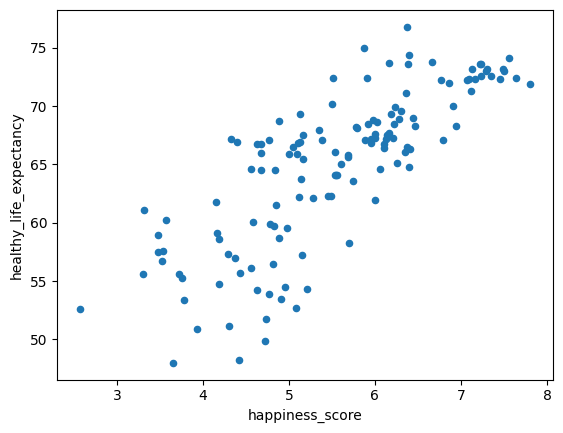

In [159]:
# Write your code here
country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.